In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8")) #check the files available in the directory

In [2]:
train=pd.read_csv('input/train.csv')
test=pd.read_csv('input/test.csv')

In [3]:
train_id=train['Id']
test_id=test['Id']
# inplace=Trueにすれば変更を元のデータに反映させることが可能
train.drop("Id",axis=1,inplace=True)
test.drop("Id",axis=1,inplace=True)

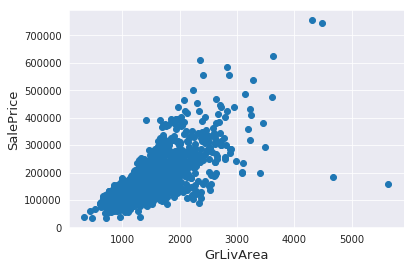

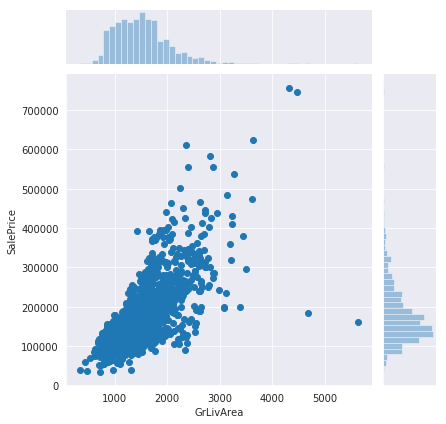

In [4]:
# pyplotでの散布図表示
fig,ax=plt.subplots()
ax.scatter(x=train['GrLivArea'],y=train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

# pandasのグラフ表示
data=pd.concat([train['GrLivArea'],train['SalePrice']],axis=1)
data.plot.scatter(x='GrLivArea',y='SalePrice')

# seabornのグラフ表示 seabornはmatplotlibのラッパー的存在
sns.jointplot(x='GrLivArea',y='SalePrice',data=data)

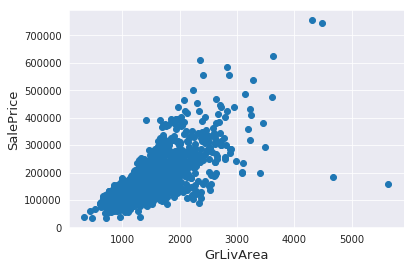

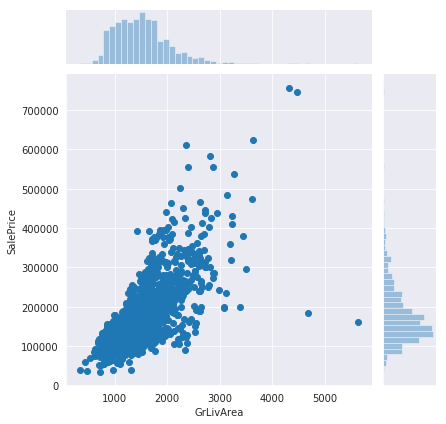

In [5]:
fig,ax=plt.subplots()

ax.scatter(x=train['GrLivArea'],y=train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

# pandasのグラフ表示
data=pd.concat([train['GrLivArea'],train['SalePrice']],axis=1)
data.plot.scatter(x='GrLivArea',y='SalePrice')

# seabornのグラフ表示 seabornはmatplotlibのラッパー的存在
sns.jointplot(x='GrLivArea',y='SalePrice',data=data)


In [6]:
train=train.drop(train[(train['GrLivArea']>4000) &(train['SalePrice']<300000)].index)


 mu = 180932.92 and sigma = 79467.79



Text(0.5, 1.0, 'SalePrice distribution')

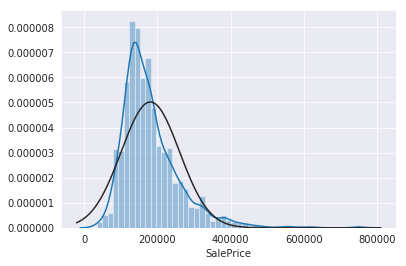

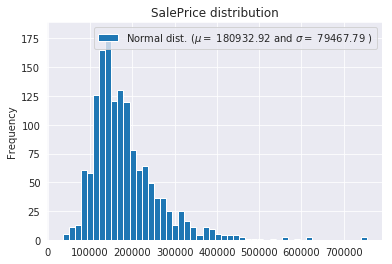

In [7]:
# seaborn でhistgram
sns.distplot(train['SalePrice'],fit=norm)

fig,ax=plt.subplots()
# pandas でhistgram
train['SalePrice'].plot.hist(bins=50,alpha=0.5)

# matplotlibでhistgram
fig,ax=plt.subplots()
plt.hist(train['SalePrice'],bins=50)

(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

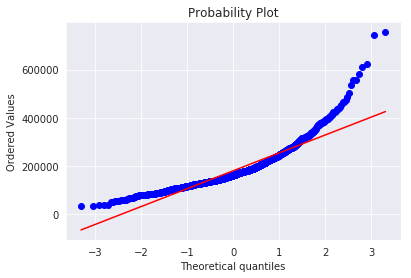

In [8]:
# 確率プロット である　QQプロットを一発でかけるのはscipy のみ
fig,ax=plt.subplots()
res=stats.probplot(train['SalePrice'],plot=plt)
plt.show()

In [9]:
train['SalePrice']=np.log1p(train['SalePrice'])

In [10]:
sns.distplot(train['SalePrice'],fit=norm)
mu,sigma=norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

fig=plt.figure()
res=stats.probplot(train['SalePrice'],plot=plt)


 mu = 12.02 and sigma = 0.40



In [11]:
# 正解ラベルを取得、データを取得するにはvaluesを使う
y_train=train.SalePrice.values
#train['SalePrice'].values

all_data=pd.concat([train,test]).reset_index(drop=True)
all_data.drop(['SalePrice'],axis=1,inplace=True)

In [12]:
all_data_na=(all_data.isnull().sum()/len(all_data))*100
all_data_na=all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending=False)
all_data_na[:30]

PoolQC         99.691
MiscFeature    96.400
Alley          93.212
Fence          80.425
FireplaceQu    48.680
LotFrontage    16.661
GarageQual      5.451
GarageCond      5.451
GarageFinish    5.451
GarageYrBlt     5.451
GarageType      5.382
BsmtExposure    2.811
BsmtCond        2.811
BsmtQual        2.777
BsmtFinType2    2.743
BsmtFinType1    2.708
MasVnrType      0.823
MasVnrArea      0.788
MSZoning        0.137
BsmtFullBath    0.069
BsmtHalfBath    0.069
Utilities       0.069
Functional      0.069
Electrical      0.034
BsmtUnfSF       0.034
Exterior1st     0.034
Exterior2nd     0.034
TotalBsmtSF     0.034
GarageArea      0.034
GarageCars      0.034
dtype: float64

<BarContainer object of 34 artists>

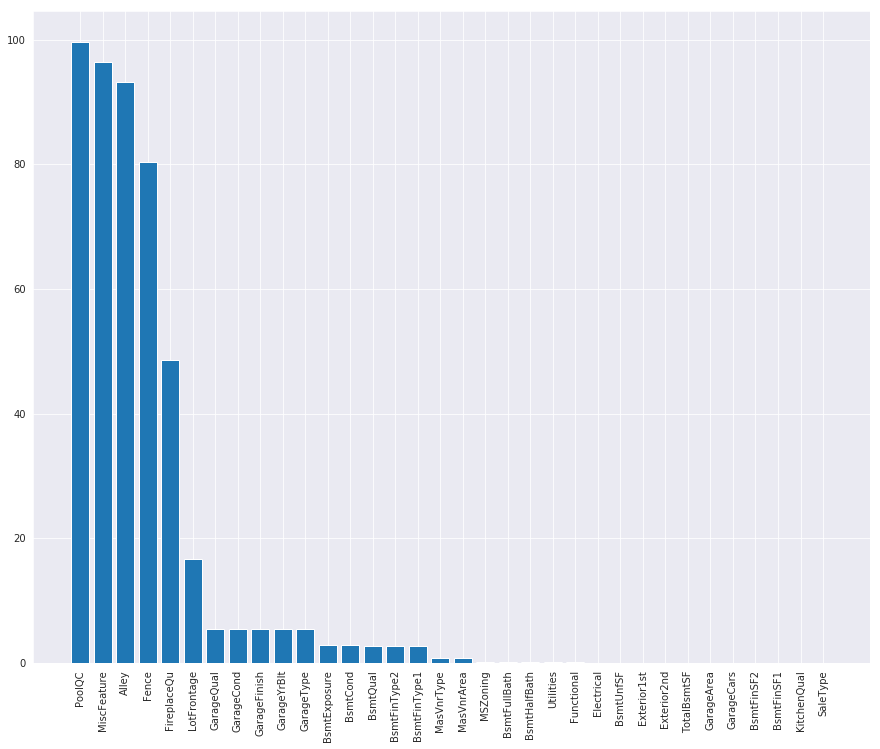

In [13]:
# seaborn　で棒グラフ
fig,ax=plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index,y=all_data_na)


# pandas　で棒グラフ
fig,ax=plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')
all_data_na.plot.bar(alpha=0.6)

# matpltlibで棒グラフ
fig,ax=plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')
plt.bar(all_data_na.index,height=all_data_na)

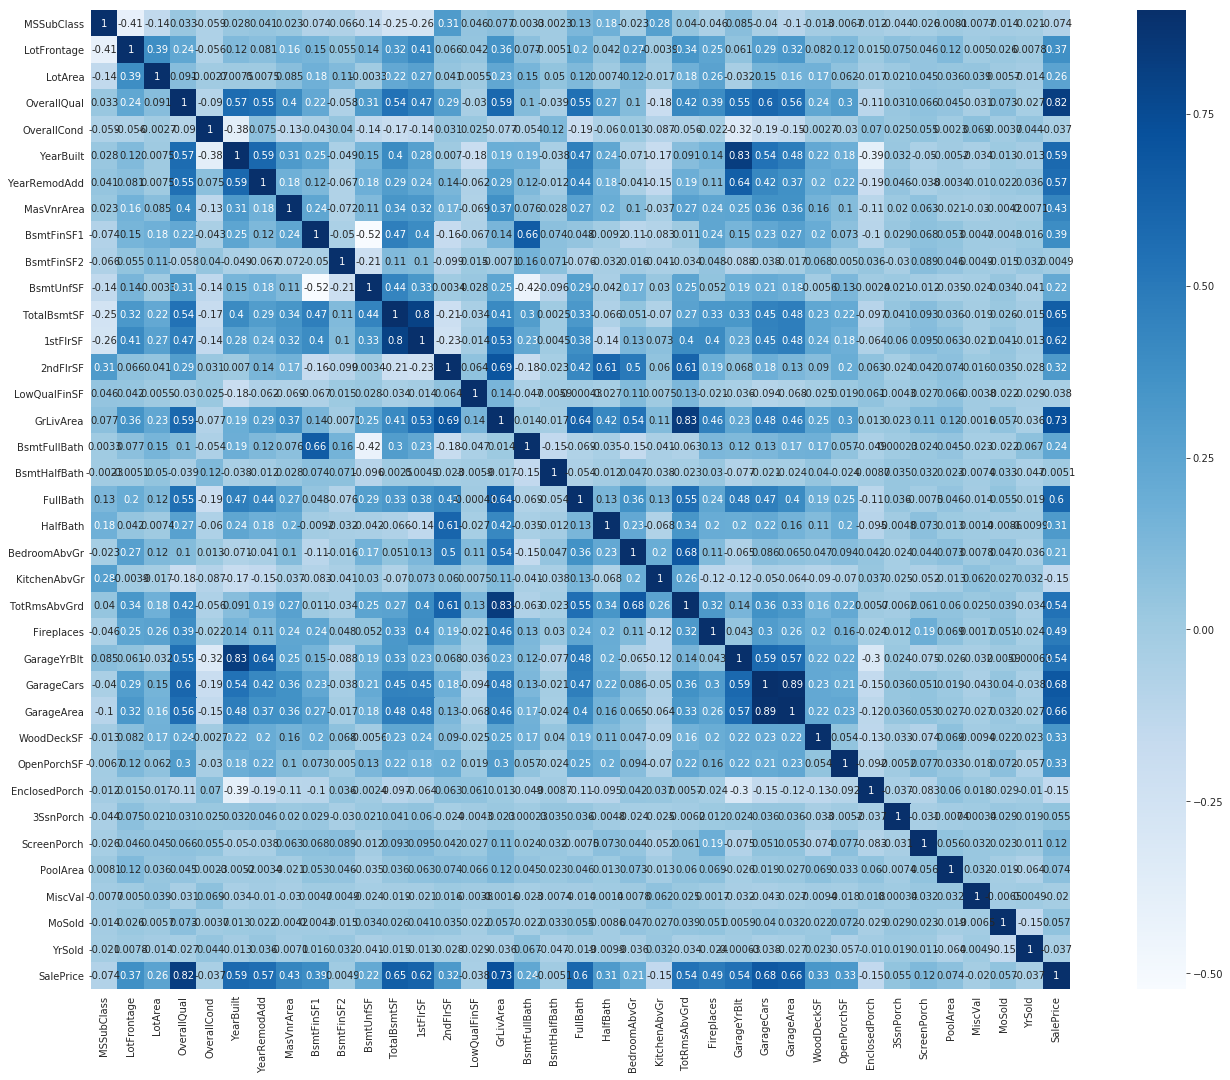

In [14]:
# pandasによる相関係数の導出
# .corr()の場合、文字列があっても相関係数を求められる。np.corrcoef,stats.pearsonrは数字でないとエラーされる
corrmat=train.corr()
corrmat

# numpy　による相関係数の導出
#corrmat_np=np.corrcoef(train)
#corrmat_np
# scipyによる相関係数の導出
#corrmat_sci=stats.pearsonr(train,train)
#corrmat_sci
fig,ax=plt.subplots(figsize=(24,18))
# Seaborn でのグラフの返り値はMatplotlibのAxesSubplotオブジェクト
sns.heatmap(corrmat,vmax=0.9,square=True,annot=True,cmap='Blues')

In [15]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

# 中央値を欠損値に入れる groupbyでneghborhoodごとの中央値を取っている
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
    
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

all_data = all_data.drop(['Utilities'], axis=1)


In [16]:
train.groupby("Neighborhood").groups

{'Blmngtn': Int64Index([ 219,  229,  385,  443,  465,  559,  597,  639,  790,  851,  982,
             1004, 1019, 1023, 1126, 1394, 1415],
            dtype='int64'),
 'Blueste': Int64Index([599, 956], dtype='int64'),
 'BrDale': Int64Index([ 225,  227,  232,  235,  363,  430,  432,  500,  655,  837, 1029,
             1104, 1219, 1291, 1334, 1378],
            dtype='int64'),
 'BrkSide': Int64Index([   9,   15,   29,   51,   77,  146,  149,  184,  250,  275,  289,
              328,  345,  361,  393,  437,  442,  459,  497,  522,  531,  533,
              546,  555,  584,  586,  589,  636,  694,  696,  710,  713,  761,
              807,  826,  912,  935,  960,  974,  976,  995, 1098, 1135, 1139,
             1145, 1202, 1218, 1255, 1263, 1285, 1321, 1323, 1352, 1389, 1397,
             1400, 1414, 1443],
            dtype='int64'),
 'ClearCr': Int64Index([  69,  120,  153,  166,  176,  249,  271,  279,  351,  358,  371,
              384,  451,  457,  588,  682,  706,  789,  800,  81

In [17]:
print(all_data['Functional'].describe())
all_data["Functional"] = all_data["Functional"].fillna("Typ")

count     2915
unique       7
top        Typ
freq      2715
Name: Functional, dtype: object


In [18]:
print(all_data['Electrical'].describe())
# mode()で最頻出を取得
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

count      2916
unique        5
top       SBrkr
freq       2669
Name: Electrical, dtype: object


In [19]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

Empty DataFrame
Columns: [Missing Ratio]
Index: []

In [20]:
# .apply で関数を適用する
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

# .astype でデータ型を変える
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [21]:
from sklearn.preprocessing import LabelEncoder
pd.options.display.max_columns = None
all_data.info()
# 特定のデータ型のみ取り出しselect_dtypes
all_data.select_dtypes(include=object)

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lbl=LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c]=lbl.transform(list(all_data[c].values))
print('Shape all_data: {}'.format(all_data.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 78 columns):
1stFlrSF         2917 non-null int64
2ndFlrSF         2917 non-null int64
3SsnPorch        2917 non-null int64
Alley            2917 non-null object
BedroomAbvGr     2917 non-null int64
BldgType         2917 non-null object
BsmtCond         2917 non-null object
BsmtExposure     2917 non-null object
BsmtFinSF1       2917 non-null float64
BsmtFinSF2       2917 non-null float64
BsmtFinType1     2917 non-null object
BsmtFinType2     2917 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2917 non-null object
BsmtUnfSF        2917 non-null float64
CentralAir       2917 non-null object
Condition1       2917 non-null object
Condition2       2917 non-null object
Electrical       2917 non-null object
EnclosedPorch    2917 non-null int64
ExterCond        2917 non-null object
ExterQual        2917 non-null object
Exterior1st      29

In [22]:
# 新しい特徴量を定義
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

# 数字の特徴量のカラムを取得
numeric_feats=all_data.dtypes[all_data.dtypes != 'object'].index

# 歪度を取得
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



Skew
MiscVal       21.940
PoolArea      17.689
LotArea       13.109
LowQualFinSF  12.085
3SsnPorch     11.372
LandSlope      4.973
KitchenAbvGr   4.301
BsmtFinSF2     4.145
EnclosedPorch  4.002
ScreenPorch    3.945

In [23]:
skewness=skewness[abs(skewness)>0.75]
from scipy.special import boxcox1p

skewed_features=skewness.index
lam=0.15

for feat in skewed_features:
    all_data[feat]=boxcox1p(all_data[feat],lam)
    

In [24]:
all_data=pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


In [102]:
ntrain=train.shape[0]
print(ntrain)
ntest=test.shape[0]
print(ntest)
train=all_data[:ntrain]
test=all_data[ntrain:]

1458
1458


##学習

In [27]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [28]:
n_folds=5

# デフォルトの交差検証cross_val_scoreではデータのシャッフルが行われないので、シャッフルした訓練データと検証データを用いるようにする
def rmsle_cv(model):
    # K分割交差検証のイテレータを作成、get_n_splits(train.values)で分割して生成されるイテレーション数を取得する,kfはただのint型
    kf=KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    
    #cross_val_score の返り値が指定した性能指標Mean squared error regression lossを返す
    rmse=np.sqrt(-cross_val_score(model,train.values,y_train,scoring="neg_mean_squared_error",cv=kf))
    return(rmse)

In [29]:
kf1=KFold(n_folds,shuffle=True,random_state=42)
print(type(kf1))
kf2=KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
print(type(kf2))

<class 'sklearn.model_selection._split.KFold'>
<class 'int'>


In [30]:
#RobustScaler　中央値を0、四分位範囲を-1 1の範囲にする
# LASSOはL1正則化を利用するモデル
# pipelineでRobustScalerと学習器にかける操作をまとめる
lasso=make_pipeline(RobustScaler(),Lasso(alpha=5e-4,random_state=1))

score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1115 (0.0074)



In [31]:
# ElasticNet RidgeとLassoの折衷案。L1正則化とL2正則化項をもつ
ENet=make_pipeline(RobustScaler(),ElasticNet(alpha=5e-4,l1_ratio=.9,random_state=1))
score=rmsle_cv(ENet)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1116 (0.0074)



In [32]:
# カーネルトリックを用いたRidge
KRR=KernelRidge(alpha=0.6,kernel='polynomial',degree=2,coef0=2.5)
score=rmsle_cv(KRR)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))



Lasso score: 0.1153 (0.0075)



In [33]:
# https://scikit-learn.org/0.18/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1177 (0.0080)



In [34]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1168 (0.0058)



In [35]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1154 (0.0071)



In [103]:
# classに引数を入れると継承ができる
class AveraginModels(BaseEstimator,RegressorMixin,TransformerMixin):
    def __init__(self,models):
        self.models=models
    
    def fit(self,X,y):
        # clone モデルの複製
        self.models_=[clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(X,y)
        
        # selfはクラスなので、もう一度自分自身を呼び出す
        return self

    def predict(self,X):
        
        predictions=np.column_stack([model.predict(X) for model in self.models_])
        
        return np.mean(predictions,axis=1)

    

    

In [104]:
average_models=AveraginModels(models=(ENet,GBoost,KRR,lasso))

score=rmsle_cv(average_models)

print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1091 (0.0075)



In [42]:
print([list() for x in range(0,5)])

[[], [], [], [], []]


In [105]:
# StackingAverageModelsではモデルを返す

class StackingAverageModels(BaseEstimator,RegressorMixin,TransformerMixin):
    
    def __init__(self,base_models,meta_model,n_folds=5):
        self.base_models=base_models
        self.meta_model=meta_model
        self.n_folds=n_folds
        
        
    def fit(self,X,y):
        # base_modelを入れるための空の配列を作成
        self.base_models_ = [list() for x in self.base_models]
        # meta_modelをclone
        self.meta_model_ = clone(self.meta_model)
        # k交差分割
        kfold=KFold(n_splits=self.n_folds,shuffle=True,random_state=156)
        
        # k交差分割で検証用に選ばれたデータで予測した値を格納
        out_of_fold_predictions=np.zeros((X.shape[0],len(self.base_models)))
        
        # base_modelごとにおこなう
        for i,model in enumerate(self.base_models):
            # k交差分割を各モデルごと行う
            for train_index,holdout_index in kfold.split(X,y):
                # 元のモデルに影響がないようにcloneする
                instance=clone(model)
                # base_models_に使用したベースモデルを追加
                self.base_models_[i].append(instance)
                # 学習
                instance.fit(X[train_index],y[train_index])
                # 学習したモデルで検証用データを予測
                y_pred=instance.predict(X[holdout_index])
                # 予測した値を格納
                out_of_fold_predictions[holdout_index,i]=y_pred
            
       # メタモデルでベースモデルが検証用データで予測した値で学習 
        self.meta_model_.fit(out_of_fold_predictions,y)
        
        return self
    
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [106]:
# stackingモデル生成
stacked_averaged_models=StackingAverageModels(base_models=(ENet,GBoost,KRR),meta_model=lasso)
#　学習　返り値はk交差検証での予測SE
score=rmsle_cv(stacked_averaged_models)
print("stacking average models score: {:.4f},({:.4f})\n".format(score.mean(),score.std()))

stacking average models score: 0.1084,(0.0074)



In [107]:
print(type(stacked_averaged_models))
print(rmsle_cv(stacked_averaged_models))

<class '__main__.StackingAverageModels'>
[0.10134814 0.11267055 0.12068123 0.10110332 0.10643134]


In [108]:
def rmsle(y,y_pred):
    return np.sqrt(mean_squared_error(y,y_pred))

In [109]:
stacked_averaged_models.fit(train.values,y_train)
stacked_train_pred=stacked_averaged_models.predict(train.values)

stacked_pred=np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train,stacked_train_pred))

0.07814905151549174


In [110]:
model_xgb.fit(train,y_train)
xgb_train_pred=model_xgb.predict(train)
xgb_pred=np.expm1(model_xgb.predict(test))
print(rmsle(y_train,xgb_train_pred))

0.07900074237023577


In [111]:
model_lgb.fit(train,y_train)
lgb_train_pred=model_lgb.predict(train)
lgb_pred=np.expm1(model_lgb.predict(test))
print(rmsle(y_train,lgb_train_pred))

0.07247823724376089


In [112]:
ensemble=stacked_pred*0.7+xgb_pred*0.15+lgb_pred*0.15

In [113]:
sub=pd.DataFrame()
sub["Id"]=test_id
print(len(test_id))
print(len(ensemble))
sub["SalePrice"]=ensemble
sub.to_csv("submission.csv",index=False)

1459
1459


In [114]:
sub

Id  SalePrice
0     1461 119522.860
1     1462 160037.284
2     1463 186967.133
3     1464 195811.797
4     1465 192701.366
5     1466 172430.397
6     1467 178029.767
7     1468 162976.176
8     1469 181076.694
9     1470 122631.541
10    1471 196503.153
11    1472  94726.560
12    1473  95085.702
13    1474 146436.833
14    1475 112651.376
15    1476 383813.085
16    1477 248227.045
17    1478 284998.647
18    1479 285577.368
19    1480 499912.877
20    1481 317225.419
21    1482 206055.264
22    1483 178976.793
23    1484 165528.075
24    1485 183818.087
25    1486 196789.211
26    1487 339066.001
27    1488 229051.760
28    1489 197744.695
29    1490 236827.451
...    ...        ...
1429  2890  79603.261
1430  2891 135641.342
1431  2892  49481.357
1432  2893  83278.964
1433  2894  58407.531
1434  2895 326879.735
1435  2896 282922.647
1436  2897 207129.835
1437  2898 146345.319
1438  2899 211452.572
1439  2900 160760.904
1440  2901 207936.236
1441  2902 190471.225
1442  2903 340028.737
1443  2904 350228.606
1444  2905  88756.961
1445  2906 192745.681
1446  2907 109444.885
1447  2908 129450.134
1448  2909 147898.477
1449  2910  78802.985
1450  2911  81309.202
1451  2912 144953.070
1452  2913  82213.406
1453  2914  75441.962
1454  2915  84396.683
1455  2916  82283.482
1456  2917 167767.093
1457  2918 115763.520
1458  2919 222382.286

[1459 rows x 2 columns]

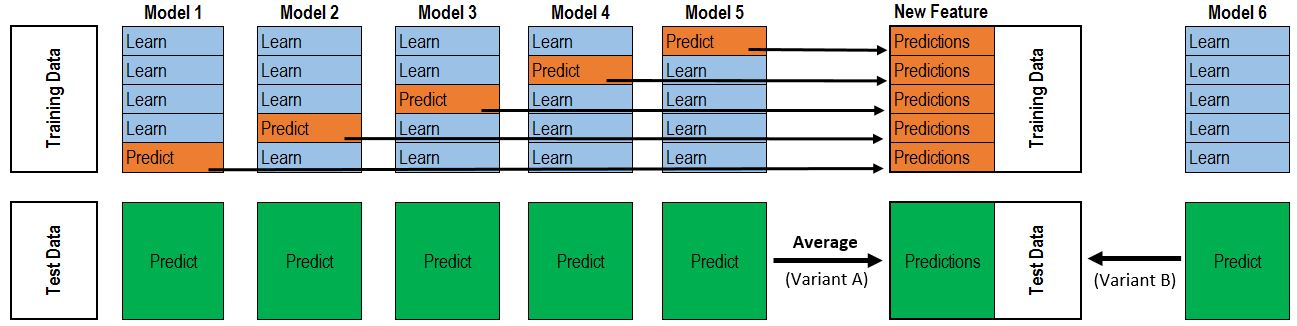